#svm

In [ ]:
#실습1
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc +'two_classes.csv')
df.head(3)

,x1,x2,y
0,2.164064,-1.012114,1
1,1.947562,-1.913494,1
2,-0.860753,-1.089006,0


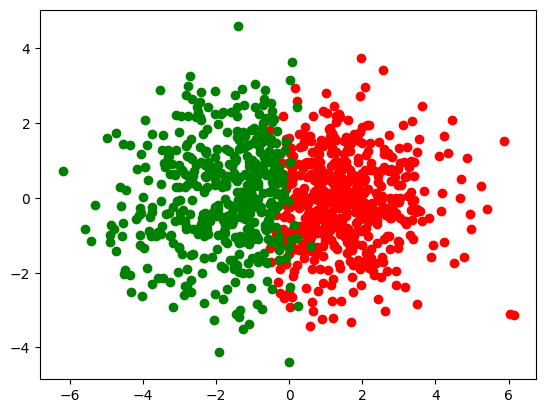

In [ ]:
df_positive = df[df['y']==1]
df_negative = df[df['y']==0]

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'],color='r')
plt.scatter(df_negative['x1'], df_negative['x2'],color='g')

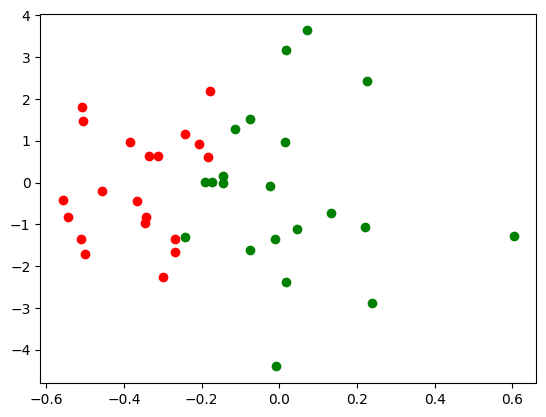

In [ ]:
df_r = df[(df.y==1) & (y_pred==0)]
df_g = df[(df.y==0) & (y_pred==1)]

import matplotlib.pyplot as plt
plt.scatter(df_r.x1, df_r.x2,color='r')
plt.scatter(df_g.x1, df_g.x2,color='g')

# svm을 pipeline사용해 구현

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X = df[['x1','x2']].to_numpy()
y = df['y'] #y열의 값이 레이블

#pipeline사용해 svm분류
svm = Pipeline([('scaler',StandardScaler()),
 ('linearSVC',LinearSVC(C=1, loss='hinge'))]) #가중치c , 손실함수loss 매개변수에 지정
svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [ ]:
y_pred = svm.predict(X)
print('예측 정확도: %.2f' %accuracy_score(y, y_pred))

예측 정확도: 0.96


#결정트리(decision tree)

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
X,y = iris.data, iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3) #최대깊이=3
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#파일을 생성함
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./d.dot"),
    feature_names=iris.feature_names,
    )
!ls

d.dot  sample_data


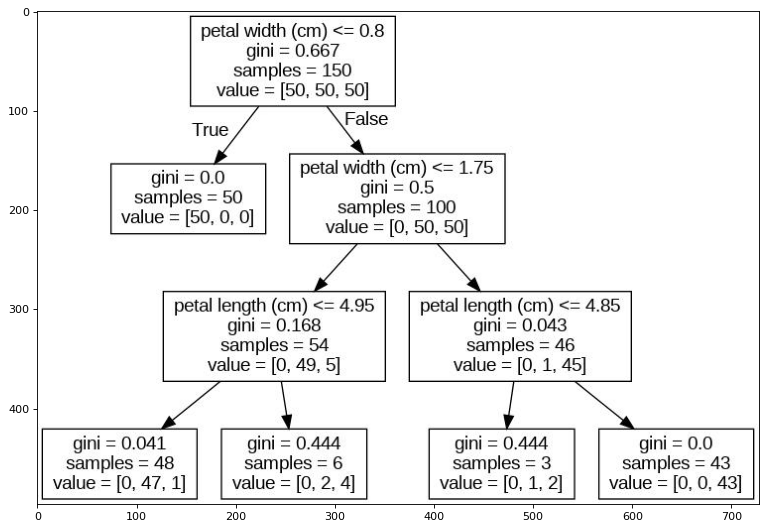

In [ ]:
!dot -Tjpg d.dot -o d.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread("./d.jpg")
plt.figure(num = None, figsize=(12,8), dpi=80,
           facecolor='w',edgecolor='k')
plt.imshow(dec_tree_img)

# 3차원공간데이터 주성분찾기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
u=np.array([1,1,1]) / np.sqrt(3)
v=np.array([1,0,-1]) / np.sqrt(2)

n_data = 1000
X=[]
for _ in range(n_data):
  r_coeff = np.random.randn(2,)
  data = 2.0 * r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
  X.append(data)
X = np.array(X)

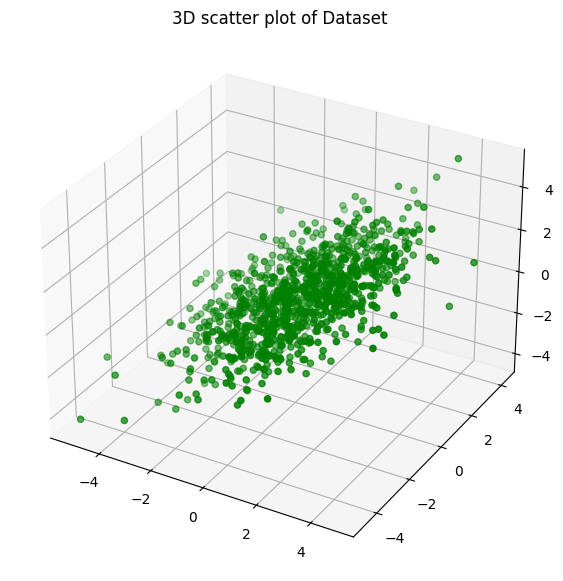

In [ ]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = '3d')

#3차원 그리기
ax.scatter3D(X[:,0],X[:,1],X[:,2], color='green')
plt.title("3D scatter plot of Dataset")
plt.show()

* 주성분 분석 pca클래스

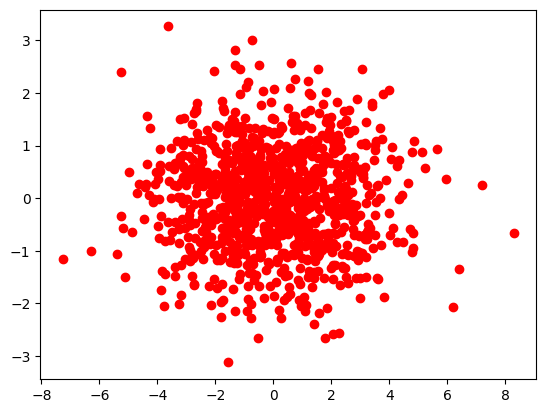

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2개의 주성분 찾음/ 2차원으로 축소

X_2d_sklearn = pca.fit_transform(X) #평균값 빼는 처리됨
plt.scatter(X_2d_sklearn[:,0], X_2d_sklearn[:,1], color = 'r')
plt.show()

#4차원공간-> 2차원 가시화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names']+ ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [1]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
features = iris['feature_names']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x) #평균값 빼는 처리됨

NameError: ignored

In [ ]:
# pca사용해 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2차원으로 축소
pca_result = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result , columns = ['PC1','PC2'])

In [ ]:
#차원축소데이터+목표값 => 데이터 프레임 만듦
finalDf = pd.concat([principalDf, df[['target']]],axis = 1)

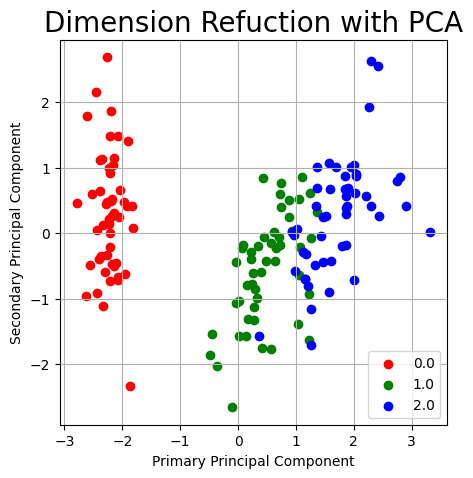

In [ ]:
#2차원 공간에 가시화
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Refuction with PCA', fontsize =20)
targets =[0.0, 1.0, 2.0]
colors = ['r','g','b']
for target,color in zip(targets,colors):
  idx = finalDf['target']==target
  ax.scatter(finalDf.loc[idx,'PC1'], finalDf.loc[idx,'PC2'],c=color)
ax.legend(targets)
ax.grid()

# tensorflow

* 미분하기

In [ ]:
def cost(x, y, w):
  n = len(x)
  hx = w*x
  c = np.sum((hx-y)**2)/n
  return c

def gradient(x, y, w):
  n = len(x)
  g = np.sum((w*x-y)*2*x)/n
  return g

w = 5
epochs = 100
learning_rate = 0.1
x_data = np.array([1,2,3])
y_data = np.array([1,2,3])

for i in range(epochs):
  c = cost(x_data, y_data, w)
  print('i:', i, 'w=:', w, 'cost=', c)
  w = w - learning_rate*gradient(x_data, y_data, w)
print('최종:', w)

i: 0 w=: 5 cost= 74.66666666666667
i: 1 w=: 1.2666666666666662 cost= 0.33185185185185057
i: 2 w=: 1.0177777777777777 cost= 0.001474897119341538
i: 3 w=: 1.0011851851851852 cost= 6.5550983081851745e-06
i: 4 w=: 1.0000790123456789 cost= 2.913377025852436e-08
i: 5 w=: 1.000005267489712 cost= 1.2948342337324674e-10
i: 6 w=: 1.0000003511659807 cost= 5.754818814648045e-13
i: 7 w=: 1.0000000234110653 cost= 2.5576972451787967e-15
i: 8 w=: 1.0000000015607375 cost= 1.1367541802473303e-17
i: 9 w=: 1.0000000001040492 cost= 5.0522448057166506e-20
i: 10 w=: 1.0000000000069367 cost= 2.245480470844397e-22
i: 11 w=: 1.0000000000004625 cost= 9.981054221661734e-25
i: 12 w=: 1.0000000000000309 cost= 4.431771261725068e-27
i: 13 w=: 1.000000000000002 cost= 1.9540742006412146e-29
i: 14 w=: 1.0 cost= 0.0
i: 15 w=: 1.0 cost= 0.0
i: 16 w=: 1.0 cost= 0.0
i: 17 w=: 1.0 cost= 0.0
i: 18 w=: 1.0 cost= 0.0
i: 19 w=: 1.0 cost= 0.0
i: 20 w=: 1.0 cost= 0.0
i: 21 w=: 1.0 cost= 0.0
i: 22 w=: 1.0 cost= 0.0
i: 23 w=: 1.0 co

* 텐서 이용한 w_b 구하기

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import SGD

x_data = np.array([1,2,3,4,5])
y_data = np.array([3, 5, 7, 9, 11])

x = tf.constant(x_data, dtype=tf.float32)
y = tf.constant(y_data, dtype=tf.float32)
w = tf.Variable(10.0)
b = tf.Variable(10.0)

def compute_cost():
  hx = w*x + b
  cost = tf.reduce_mean((hx-y)**2)
  return cost

optimizer = SGD(learning_rate=0.01) # 미분 이상이 구현되어 있음
for i in range(50):
   optimizer.minimize(compute_cost, var_list=[w, b])
   # w = w- 0.01*w에 대한 미분
   # b = b- 0.01*w에 대한 미분
   print(i, '코스트', compute_cost().numpy())


0 코스트 712.17365
1 코스트 417.96567
2 코스트 246.49605
3 코스트 146.55228
4 코스트 88.29037
5 코스트 54.318737
6 코스트 34.502377
7 코스트 22.935177
8 코스트 16.17528
9 코스트 12.216978
10 코스트 9.891439
11 코스트 8.517516
12 코스트 7.6982765
13 코스트 7.202403
14 코스트 6.895097
15 코스트 6.697802
16 코스트 6.564739
17 코스트 6.4692307
18 코스트 6.395726
19 코스트 6.3351665
20 코스트 6.2822676
21 코스트 6.2339573
22 코스트 6.188433
23 코스트 6.1446543
24 코스트 6.102006
25 코스트 6.0601325
26 코스트 6.0188284
27 코스트 5.9779673
28 코스트 5.937477
29 코스트 5.8973184
30 코스트 5.857464
31 코스트 5.8178954
32 코스트 5.7786064
33 코스트 5.7395883
34 코스트 5.7008376
35 코스트 5.662351
36 코스트 5.624126
37 코스트 5.5861588
38 코스트 5.548449
39 코스트 5.510995
40 코스트 5.4737926
41 코스트 5.436841
42 코스트 5.40014
43 코스트 5.363686
44 코스트 5.327478
45 코스트 5.2915144
46 코스트 5.2557945
47 코스트 5.2203155
48 코스트 5.185075
49 코스트 5.150073


# 텐서플로 선형회귀

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

path = 'https://raw.githubusercontent.com/hjpark90/data-mining-2023/main/'
df = pd.read_csv(path+'cars.csv',index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


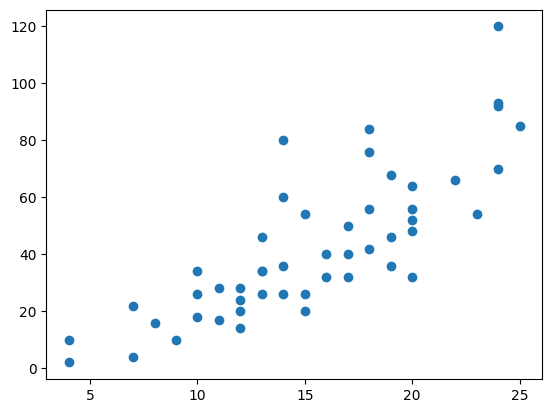

In [ ]:
x_data = df['speed'].values
y_data = df['dist'].values

plt.scatter(x_data,y_data)
plt.show()

In [ ]:
x = tf.constant(x_data,tf.float32)
y = tf.constant(y_data,tf.float32) #텐서노드생성

w = tf.Variable(tf.random.uniform([1])) #임의의 1개의 값
b = tf.Variable(tf.random.uniform([1]))

* cost구하기

In [ ]:
def compute_cost():
  hx =w*x + b
  cost = tf.reduce_mean((hx - y)**2)
  return cost

compute_cost().numpy()

2223.5984

In [ ]:
optimizer = SGD(learning_rate=0.001) #최저값을 지나친 경우
epochs = 100
hist_cost = []
for i in range(epochs): #미분 이상 구현
  optimizer.minimize(compute_cost, var_list=[w,b])
  c = compute_cost().numpy()
  hist_cost.append(c) #cost값을 hist_cost에 넣기
  print(i,'cost',c,'w:',w.numpy(), 'b:',b.numpy())

0 cost 692.1955 w: [1.6179614] b: [0.22096407]
1 cost 355.2118 w: [2.29434] b: [0.25664893]
2 cost 281.05048 w: [2.611734] b: [0.27142996]
3 cost 264.72125 w: [2.7607331] b: [0.2764057]
4 cost 261.1175 w: [2.8307407] b: [0.2767823]
5 cost 260.31387 w: [2.8636942] b: [0.2750019]
6 cost 260.12643 w: [2.8792663] b: [0.27221012]
7 cost 260.07452 w: [2.886685] b: [0.2689443]
8 cost 260.0525 w: [2.8902788] b: [0.2654565]
9 cost 260.03702 w: [2.8920784] b: [0.261865]
10 cost 260.02298 w: [2.8930364] b: [0.25822526]
11 cost 260.0093 w: [2.8935997] b: [0.2545633]
12 cost 259.9957 w: [2.8939776] b: [0.2508913]
13 cost 259.98212 w: [2.8942688] b: [0.247215]
14 cost 259.9685 w: [2.894519] b: [0.2435371]
15 cost 259.95496 w: [2.89475] b: [0.23985884]
16 cost 259.9413 w: [2.8949723] b: [0.23618081]
17 cost 259.92776 w: [2.8951902] b: [0.23250331]
18 cost 259.91418 w: [2.895406] b: [0.22882645]
19 cost 259.9007 w: [2.895621] b: [0.22515029]
20 cost 259.88715 w: [2.8958354] b: [0.22147486]
21 cost 259

In [ ]:
w.numpy(), b.numpy()

(array([2.9126053], dtype=float32), array([-0.06650066], dtype=float32))

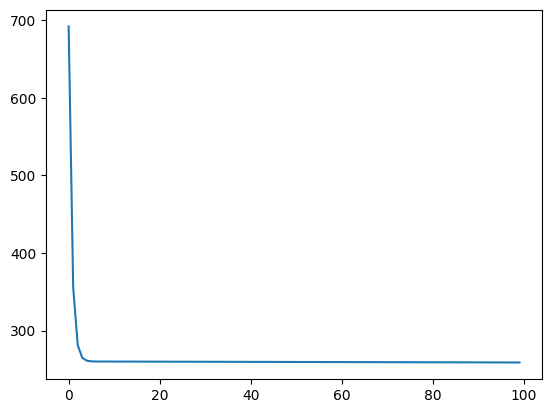

In [ ]:
plt.plot(hist_cost)
plt.show()

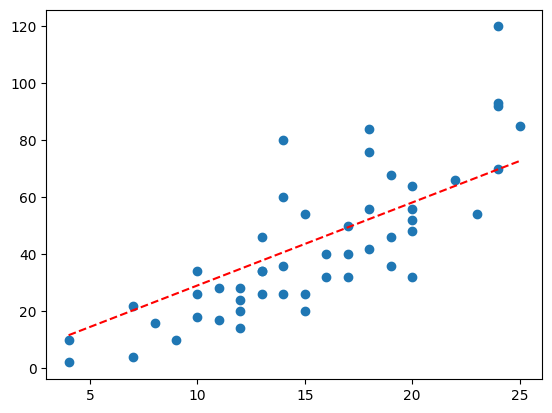

In [ ]:
#예측값 구하기
def hxFn(input):
  xd = np.float32(input)
  hx = w * xd + b
  return hx.numpy()

plt.scatter(x_data,y_data) # 실제값을 scatter로 그리기
plt.plot(x_data, hxFn(x_data),'r--') #예측값 직선으로 그리기
plt.show()

In [ ]:
hxFn(10)

array([29.059551], dtype=float32)

#텐서플로 다중선형회귀

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
x_data1 = [1,2,3,4,5]   # 공부한 시간
x_data2 = [1,2,3,4,5]   # 출석일수
y_data = [50,60,70,80,90]    # 점수

In [ ]:
x1 = tf.constant(x_data1, tf.float32) #constant 객체만들기
x2 = tf.constant(x_data2, tf.float32)
y = tf.constant(y_data, tf.float32)

In [ ]:
w1 = tf.Variable(tf.random.uniform([1])*10)
w2 = tf.Variable(tf.random.uniform([1])*10)
b = tf.Variable(tf.random.uniform ([1])*10)

In [ ]:
def compute_loss():
  hx = w1*x1 + w2*x2 +b #가설
  cost = tf.reduce_mean((hx-y)**2) #코스트함수
  return cost

In [ ]:
optimizer = Adam(0.1)
for i in range(100):
  optimizer.minimize(compute_loss, var_list = [w1, w2, b])
  print(i, '코스트:', compute_loss().numpy())

0 코스트: 962.2256
1 코스트: 921.3094
2 코스트: 881.5843
3 코스트: 843.06854
4 코스트: 805.77747
5 코스트: 769.7247
6 코스트: 734.9218
7 코스트: 701.37787
8 코스트: 669.0998
9 코스트: 638.09216
10 코스트: 608.35626
11 코스트: 579.8917
12 코스트: 552.6948
13 코스트: 526.75934
14 코스트: 502.07617
15 코스트: 478.63348
16 코스트: 456.41656
17 코스트: 435.4081
18 코스트: 415.5882
19 코스트: 396.93393
20 코스트: 379.4201
21 코스트: 363.01904
22 코스트: 347.7007
23 코스트: 333.43277
24 코스트: 320.18097
25 코스트: 307.90918
26 코스트: 296.57953
27 코스트: 286.15292
28 코스트: 276.5887
29 코스트: 267.8454
30 코스트: 259.88074
31 코스트: 252.65144
32 코스트: 246.11467
33 코스트: 240.22696
34 코스트: 234.94539
35 코스트: 230.227
36 코스트: 226.02979
37 코스트: 222.31258
38 코스트: 219.03506
39 코스트: 216.1584
40 코스트: 213.64499
41 코스트: 211.45886
42 코스트: 209.56564
43 코스트: 207.93303
44 코스트: 206.53018
45 코스트: 205.32852
46 코스트: 204.30148
47 코스트: 203.42438
48 코스트: 202.67467
49 코스트: 202.03165
50 코스트: 201.47685
51 코스트: 200.99345
52 코스트: 200.5667
53 코스트: 200.18344
54 코스트: 199.83232
55 코스트: 199.5036
56 코스트: 199.18881
57 

In [ ]:
w1.numpy(), w2.numpy(), b.numpy()

(array([8.83038], dtype=float32),
 array([9.926468], dtype=float32),
 array([8.510294], dtype=float32))

In [ ]:
# 점수 예측
# 5시간 공부 5일 출석
w1.numpy()*5 + w2.numpy()*5 + b.numpy()

array([102.29453], dtype=float32)

* tensorflow이용 다중회귀직선 구하기

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

path = 'https://raw.githubusercontent.com/hjpark90/data-mining-2023/main/'
df = pd.read_csv(path+'BostonHousing.csv',index_col=0)
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x_data1 = df['medv'].values
#x_data2 = df['medv'].values
y_data = df['dis'].values

x1 = tf.constant(x_data1, tf.float32) #constant 객체만들기
#x2 = tf.constant(x_data2, tf.float32)
y = tf.constant(y_data, tf.float32)

w1 = tf.Variable(tf.random.uniform([1]))
#w2 = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform ([1]))

def compute_loss():
  hx = w1*x1 +b #가설
  cost = tf.reduce_mean((hx-y)**2) #코스트함수
  return cost

optimizer = SGD(learning_rate=0.001) #최저값을 지나친 경우
epochs = 100
hist_cost = []
for i in range(epochs): #미분 이상 구현
  optimizer.minimize(compute_loss, var_list=[w1,b])
  c = compute_loss().numpy()
  hist_cost.append(c)
  print(i,'cost',c,'w:',w1.numpy(), 'b:',b.numpy())


0 cost 18.970112 w: [-0.02688134] b: [0.62926304]
1 cost 5.142897 w: [0.1572832] b: [0.636806]
2 cost 4.66421 w: [0.12300287] b: [0.6360344]
3 cost 4.647374 w: [0.1293553] b: [0.63680923]
4 cost 4.6465173 w: [0.12814967] b: [0.6372962]
5 cost 4.646214 w: [0.12834992] b: [0.6378366]
6 cost 4.6459303 w: [0.12828866] b: [0.6383668]
7 cost 4.6456475 w: [0.12827605] b: [0.6388988]
8 cost 4.645364 w: [0.1282544] b: [0.6394302]
9 cost 4.645082 w: [0.12823445] b: [0.6399616]
10 cost 4.6447997 w: [0.12821417] b: [0.6404928]
11 cost 4.644517 w: [0.12819397] b: [0.6410239]
12 cost 4.644235 w: [0.12817375] b: [0.6415548]
13 cost 4.6439533 w: [0.12815356] b: [0.6420855]
14 cost 4.6436715 w: [0.12813336] b: [0.6426161]
15 cost 4.643389 w: [0.12811318] b: [0.6431465]
16 cost 4.643108 w: [0.12809299] b: [0.6436768]
17 cost 4.6428256 w: [0.12807281] b: [0.64420694]
18 cost 4.6425443 w: [0.12805264] b: [0.64473695]
19 cost 4.642263 w: [0.12803248] b: [0.6452668]
20 cost 4.641982 w: [0.12801231] b: [0.64

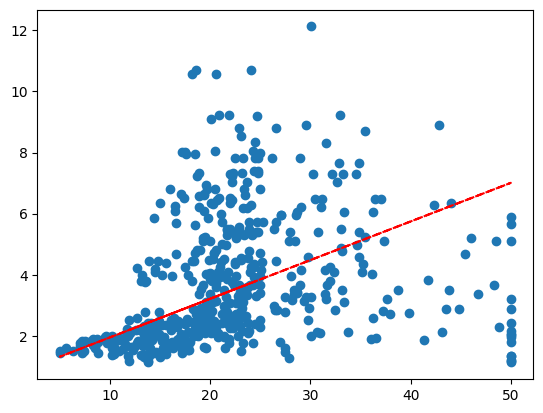

In [ ]:
#예측값
def hxFn(input):
  xd = np.float32(input)
  hx = w1 * xd + b
  return hx.numpy()

plt.scatter(x_data1,y_data)
plt.plot(x_data1, hxFn(x_data1),'r--')
plt.show()

#Keras 선형회귀

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
path='https://raw.githubusercontent.com/hjpark90/data-mining-2023/main/'
df = pd.read_csv(path+'cars.csv', index_col = 0)

x_data = df['speed'].values    # keras에서는 노드를 만들 필요가 없음
y_data = df['dist'].values

In [ ]:
IO = Dense(units=1, input_dim=1) # w, b 정의(라벨 갯수, 특성 데이터 갯수)
model = Sequential([IO]) # sequential 객체위에 Dense를 쌓는다, 향후 deep learning 참조
model.compile(loss='mse', optimizer=Adam(0.1))
# learning rate Adam은 조절해주므로 민감하지 않음
h = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 3726.8625
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 3339.5566
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 2956.8748
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 2632.2925
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 2322.0205
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 2016.0088
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 1764.2145
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 1518.0569
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 1313.8579
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 1119.7083
Epoch 11/500
2/2 [==============================] - 0s 4ms/step - loss: 951.8209
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 832.0371
Epoch 13/500
2/2 [=========

In [ ]:
w,b= IO.get_weights()
w,b

(array([[3.5211537]], dtype=float32), array([-10.893508], dtype=float32))

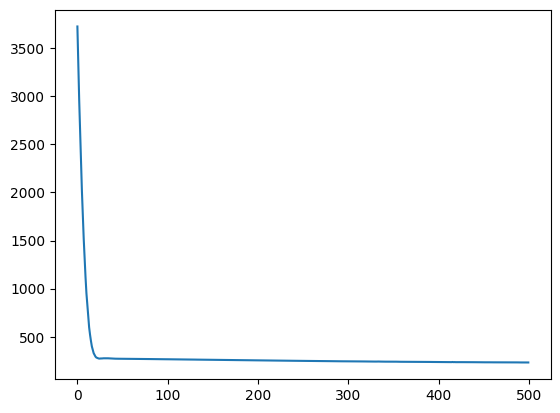

In [ ]:
plt.plot(h.history['loss'])
plt.show()

In [ ]:
model.predict([10, 15])

1/1 [==============================] - 0s 106ms/step


array([[24.318027],
       [41.923798]], dtype=float32)

2/2 [==============================] - 0s 7ms/step


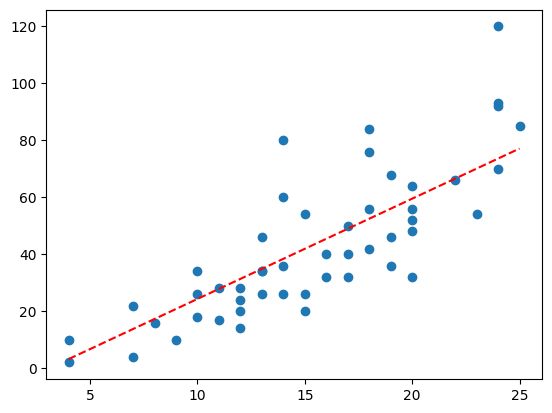

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r--')
plt.show()

* keras이용 다중회귀직선만들기

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

path = 'https://raw.githubusercontent.com/hjpark90/data-mining-2023/main/'
df = pd.read_csv(path+'BostonHousing.csv',index_col=0)
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x_data = df['medv'].values
y_data = df['dis'].values

IO = Dense(units=1, input_dim=1) # w, b 정의(라벨 갯수, 특성 데이터 갯수)
model = Sequential([IO]) # sequential 객체위에 Dense를 쌓는다, 향후 deep learning 참조
model.compile(loss='mse', optimizer=Adam(0.1))
# learning rate Adam은 조절해주므로 민감하지 않음
h = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 189.0113
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 33.6072
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 9.8003
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 6.1914
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 5.7386
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 5.5702
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 5.4374
Epoch 8/500
16/16 [==============================] - 0s 5ms/step - loss: 5.3416
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 5.2581
Epoch 10/500
16/16 [==============================] - 0s 3ms/step - loss: 5.1143
Epoch 11/500
16/16 [==============================] - 0s 3ms/step - loss: 5.0409
Epoch 12/500
16/16 [==============================] - 0s 3ms/step - loss: 4.9833
Epoch 13/500
16/16 [==============

16/16 [==============================] - 0s 1ms/step


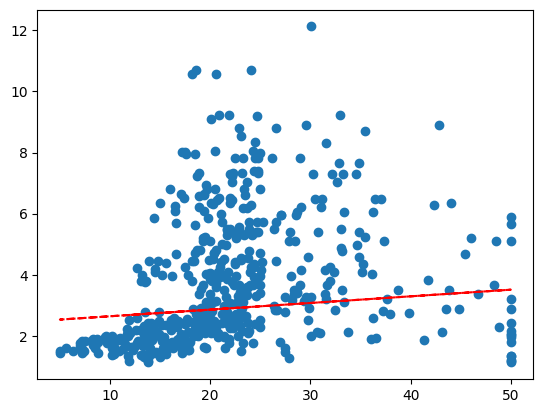

In [ ]:
w, b = IO.get_weights()
plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r--')
plt.show()

#AND, OR회로를 퍼셉트론으로

In [ ]:
import numpy as np
def activation(s):
  if s>0:return 1
  else: return -1

def perceptron(x1,x2):
  x = np.array([x1,x2])
  tmp = np.sum(W*x)+b
  return activation(tmp)

print("perceptron AND회로")
W = np.array([0.5,0.5])
b = -0.7
for x1,x2 in[(-1,-1),(-1,1),(1,-1),(1,1)]:
  y = perceptron(x1,x2)
  print('{:3d} {:3d} : {:3d}'.format(x1,x2,y))

perceptron AND회로
 -1  -1 :  -1
 -1   1 :  -1
  1  -1 :  -1
  1   1 :   1


In [ ]:
print("perceptron OR회로")
W = np.array([0.5,0.5])
b = 0.7
for x1,x2 in[(-1,-1),(-1,1),(1,-1),(1,1)]:
  y = perceptron(x1,x2)
  print('{:3d} {:3d} : {:3d}'.format(x1,x2,y))

perceptron OR회로
 -1  -1 :  -1
 -1   1 :   1
  1  -1 :   1
  1   1 :   1


In [ ]:
def activation(s): #활성화 함수
  if s>0:return 1
  else: return -1

def out(x):
  return activation(W.dot(x))

def train(X,Y,epochs=10): #10번반복
  global W,learning_rate # 가중치 w를 갱신
  for t in range(epochs):
    print('epoch=',t,'\n=======')
    adjusted =0
    for i in range(len(X)):
      y_hat = out(X[i])
      error = Y[i]-y_hat
      if error !=0: adjusted +=1
      W += learning_rate * error *X[i]
      print('입력:',X[i],'정답',Y[i],'출력:',y_hat,\
            '변경된 가중치:',W,'error:',error)
    if adjusted == 0 :return

In [ ]:
X = np.array([[-1,-1,1],
              [-1,1,1],
              [1,-1,1],
              [1,1,1]])
Y = np.array([-1,1,1,-1])
W=np.array([0,0,0],dtype = np.float64)
learning_rate = 0.1

train(X,Y,100)
#predict(X,'XOR')

epoch= 0 
입력: [-1 -1  1] 정답 -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0


In [ ]:
import numpy as np
w1 = np.array([.5,.5]) #가중치
w2 = np.array([.5,.5])
b1,b2 = -.7,.7

def activation(s):
  if s>0:return 1
  else: return -1

def perceptron(x,w,b):
  y = np.sum(w*x)+b
  return activation(y)

def AND(x1,x2):
  return perceptron(np.array([x1,x2]),w1,b1)

def NAND(x1,x2):
  return perceptron(np.array([x1,x2]),-w1,-b1)

def OR(x1,x2):
  return perceptron(np.array([x1,x2]),w2,b2)

def XOR(x1,x2):
  return AND(NAND(x1,x2),OR(x1,x2))

print("다중 퍼셉트론으로 구현한 XOR회로")

for x in[(-1,-1),(1,-1),(-1,1),(1,1)]:
  y = XOR(x[0],x[1])
  print('{:2d} {:3d} : {:3d}'.format(x[0],x[1],y))

다중 퍼셉트론으로 구현한 XOR회로
-1  -1 :  -1
 1  -1 :   1
-1   1 :   1
 1   1 :  -1


#minst실습

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train_image.shape=', train_images.shape)
print('test_image.shape=', test_images.shape)
print('train_labels.shape=', train_labels.shape)
print('test_labels.shape=', test_labels.shape)

train_image.shape= (60000, 28, 28)
test_image.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [ ]:
num=train_images[0]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]), end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

train_labels[:4]= [5 0 4 1]


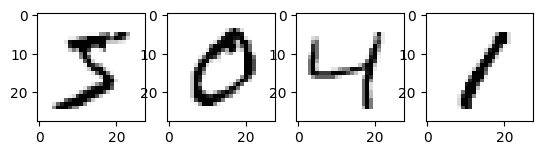

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0],cmap='Greys') #첫번째 훈련용 데이터
ax2.imshow(train_images[1],cmap='Greys')
ax3.imshow(train_images[2],cmap='Greys')
ax4.imshow(train_images[3],cmap='Greys')

print('train_labels[:4]=', train_labels[:4])

In [ ]:
#1단계 전처리(정규화):0~1사이로
train_images, test_images = train_images/255, test_images/255

In [ ]:
#2단게 신경망 모델 만들기->텐서플로우
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Flatten:1차원객체로 만듦
    keras.layers.Dense(256,activation = 'relu'), #은닉층
    keras.layers.Dense(10,activation='softmax')
])
#Dense: 완전연결층(밀집됨)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#3단계 활성화,최적화, 손실함수 정의
model.compile(optimizer='adam', #최적화기법(adam)
              loss='sparse_categorical_crossentropy', #손실함수
              metrics=['accuracy'])
#compile:환경설정

In [ ]:
#4단계 훈련데이터 학습시작-> epoch(한번훈련실시)를 반복(5번)
model.fit(train_images,train_labels, epochs=5,verbose=1)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2288 - accuracy: 0.9335
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0931 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0614 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0334 - accuracy: 0.9895


In [ ]:
#5단계 테스트데이터 이용-> 훈련용보다 정확도 조금 떨어짐
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)

313/313 - 1s - loss: 0.0752 - accuracy: 0.9765 - 780ms/epoch - 2ms/step

테스트 정확도: 0.9764999747276306


In [ ]:
#6단계 조금더 개선 -> 은닉층깊게, 에폭증가
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Flatten:1차원객체로 만듦
    keras.layers.Dense(256,activation = 'relu'), #은닉층
    keras.layers.Dense(128,activation = 'relu'), #은닉층
    keras.layers.Dense(100,activation = 'relu'), #은닉층(원하는데로 넣어도됌) -> 은닉층많아지면 계산 어려워짐
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #손실함수->최적화기법(adam)
              metrics=['accuracy'])
train_images, test_images = train_images/255, test_images/255
model.fit(train_images,train_labels, epochs=5,verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)
#모델의 층을 무작정 깊이 만드는 방법은 한계

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6587 - accuracy: 0.7883
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3079 - accuracy: 0.9070
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2158 - accuracy: 0.9351
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1655 - accuracy: 0.9499
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1346 - accuracy: 0.9589
313/313 - 1s - loss: 0.1310 - accuracy: 0.9585 - 767ms/epoch - 2ms/step

테스트 정확도: 0.9585000276565552


#새이미지 잘 학습하는가

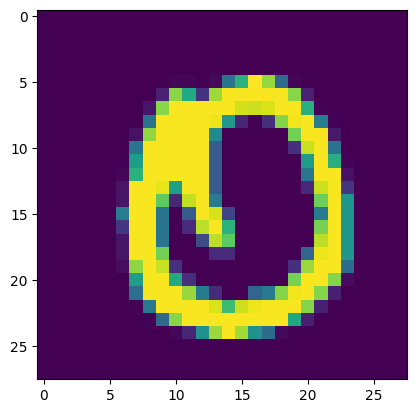

In [ ]:
randidx = np.random.randint(0,6000)
plt.imshow(test_images[randidx])

In [ ]:
yhat = model.predict(test_images[randidx])
#2차원 데이터를 3차원데이터로 변화시켜야 오류 안 난다.

ValueError: ignored

In [ ]:
#축 하나 추가해 3차원으로 만들기 (1, 28, 28)
pred = model.predict(test_images[randidx][np.newaxis,:,:])
pred.argmax() #확률값중 가장 큰값

1/1 [==============================] - 0s 69ms/step


0

#softmax함수

In [ ]:
def softmax(a):
  exp_of_a = np.exp(a) #각각의 지수함수
  sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
  y = exp_of_a / sum_exp # 각각의 확률값
  return y

a=np.array([0.5,4.1,2.5,5.6,1.2])
print('predict: ',a)
print("softmax 출력: ", softmax(a))
print("softmax 최댓값: ", np.max(softmax(a)))

predict:  [0.5 4.1 2.5 5.6 1.2]
softmax 출력:  [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]
softmax 최댓값:  0.7772704668966948


# 새로운 이미지 가져와 학습

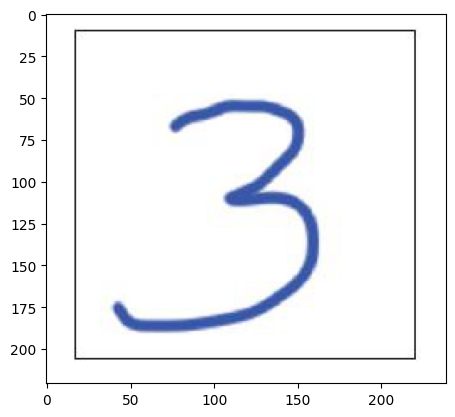

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('./12.9.JPG')
plt.imshow(img)

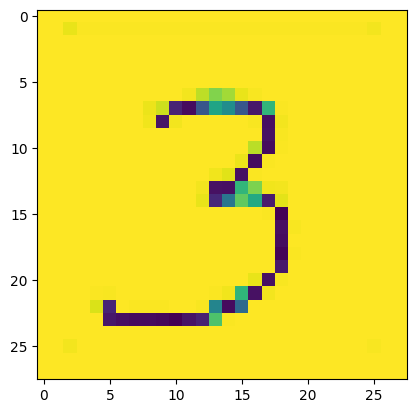

In [ ]:
import cv2
# (28,28), 회색조이미지 -> 전처리
img = cv2.imread('./12.9.JPG', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28))
plt.imshow(img)

In [ ]:
#3차원으로 변경
pre = model.predict(img[np.newaxis,:,:])
pred.argmax()

1/1 [==============================] - 0s 17ms/step


3

In [ ]:
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(img[i][j]), end='')
  print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 249 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 252 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 252 238 222 231 249 253 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 250 242  99  87 128 183 167 129  93 196 254 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 251  92 252 255 255 255 255 255 253  89 252 255 255 255 255 255

In [ ]:
img = (255-img)/255 #색상 반전, 0~1사이 실수로 만들기
pred = model.predict(img[np.newaxis,:,:])
pred.argmax()

1/1 [==============================] - 0s 27ms/step


3

#붓꽃 분류하기

In [ ]:
from sklearn.datasets import load_iris
import tensorflow as tp
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0, test_size=0.20) #80%:학습 / 20%:테스트

In [ ]:
#순차모델생성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(60,activation = 'relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=1)

Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 1.0406 - accuracy: 0.5000
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.6917
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7250
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7500
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7167
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8750
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7500
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8583
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8500
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.9167
Epoch 11/30
24/24 [

In [ ]:
#분류정확도 높이기위해 층 추가
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(60,activation = 'relu'),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델 학습 결과:')
eval_loss , eval_acc = model.evaluate(x_test, y_test)
print('분류정확도:',eval_acc )

신경망 모델 학습 결과:
1/1 [==============================] - 0s 130ms/step - loss: 0.0931 - accuracy: 1.0000
분류정확도: 1.0


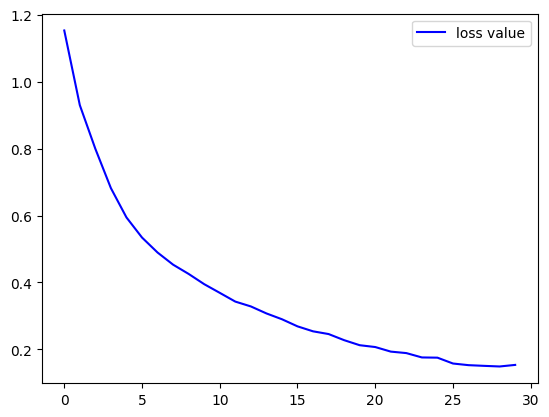

In [ ]:
plt.plot(hist.history['loss'], 'b-', label = 'loss value')
plt.legend()

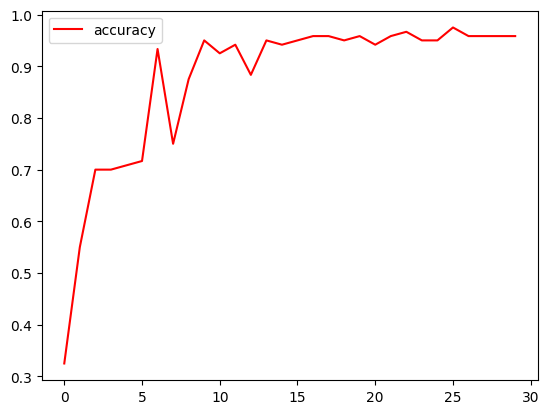

In [ ]:
plt.plot(hist.history['accuracy'],'r-',label='accuracy')
 #train데이터 학습시킨것의 정확도
plt.legend()

#학습모델 저장, 불러오기

In [ ]:
model.save(',/iris_model.h5')
!ls -l

from google.colab import drive
#drive.mount('./content/drive')
model.save('./drive/MyDrive/iris_model.h5')

total 20
drwxr-xr-x 2 root root  4096 Jun  6 16:44 ,
-rw-r--r-- 1 root root 12260 Jun  6 16:28 12.9.JPG
drwxr-xr-x 1 root root  4096 Jun  2 13:39 sample_data


#수치값 예측

In [ ]:
x_train = np.array([[0],[1],[2]])
y_train = 3*x_train+1
x_test = np.array([[3],[4],[5]])
y_test = 3*x_test+1

print('x_train:', x_train.flatten(),'y_train:',y_train.flatten())
print('x_test:', x_test.flatten(),'y_test:',y_test.flatten())

model = keras.Sequential() #순차신경망
model.add(keras.layers.Dense(4,input_shape=(1,)))
model.add(keras.layers.Dense(1))

model.summary()

x_train: [0 1 2] y_train: [1 4 7]
x_test: [3 4 5] y_test: [10 13 16]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',#확률적 경사하강법
              loss='mean_squared_error', #mse 평균제곱오차
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=2)

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 14.3586 - accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 7.7226 - accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 2.3471 - accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8497 - accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 0.1195 - accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.3333
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.3333
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.3333
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.3333


In [ ]:
pred = model.predict(x_test)
print('x_test:', x_test.flatten(),'예측:',pred.flatten())

1/1 [==============================] - 0s 53ms/step
x_test: [3 4 5] 예측: [ 9.926664 12.870717 15.814768]
